**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Active Class 3**

*   M3: Análisis, visualización y transformación de datos

---

En esta actividad usarás el archivo de datos `fitness.csv`, donde se ha recopilado información sobre las personas que compraron una cinta de correr en una tienda minorista durante tres meses.

* `Product`: Producto adquirido (TM195, TM498 o TM798)
* `Age`: Edad en años
* `Gender`: Género
* `Education`: Educación en años
* `MaritalStatus`: Estado civil (soltero o en pareja)
* `Usage`: Número promedio de veces que el cliente planea usar la máquina para correr cada semana
* `Fitness`: Aptitud autoevaluada en una escala del 1 al 5, donde 1 es mala forma y 5 es excelente forma
* `Income`: Ingreso anual del hogar
* `Miles`: Número promedio de millas que el cliente espera caminar/correr cada semana

Descarga el archivo: `fitness.csv` y guarda, en un dataframe (`fit_df`), todos sus registros.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
fit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNA/TC5053 - Ciencia y analítica de datos/Active class 3/fitness.csv')
fit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
# Librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
# Determinando la cantidad de valores únicos por columna
fit_df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [6]:
# Estadísticas descriptivas de las variables numéricas
fit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [7]:
# Estadísticas descriptivas de las variables de texto
fit_df.describe(include = ['object','category']).T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [8]:
# Se hace una lista de variables numéricas y otra de categóricas
num_cols = fit_df.select_dtypes(include=['number']).columns
cat_cols = fit_df.select_dtypes(include=['category','object']).columns

In [9]:
# Recuento de cada categoría única en las variables categóricas
for column in cat_cols:
    print(column)
    print(fit_df[column].value_counts())
    print('-' * 50)

Product
Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64
--------------------------------------------------
Gender
Gender
Male      104
Female     76
Name: count, dtype: int64
--------------------------------------------------
MaritalStatus
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64
--------------------------------------------------


In [10]:
# Comprobando valores faltantes
fit_df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


## **Análisis univariado**

Variables numéricas

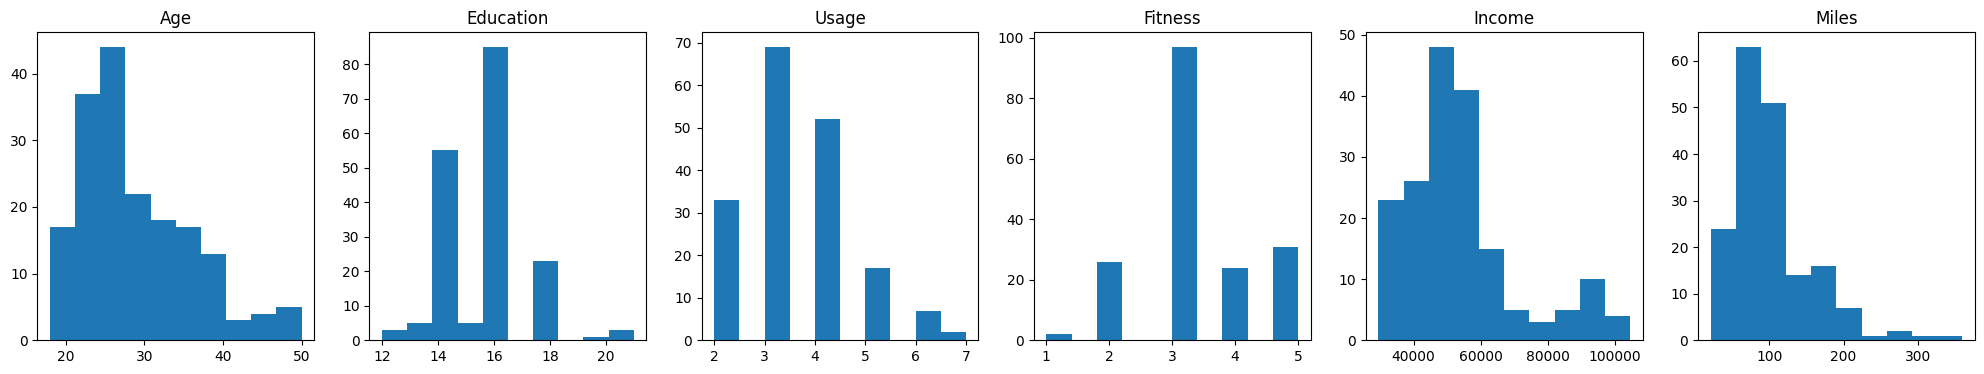

In [11]:
fig, axes = plt.subplots(1,6, figsize=(25,4))
axes = axes.ravel()
for col, ax in zip(fit_df[num_cols], axes):
  ax.hist(fit_df[col])
  ax.set(title=f'{col}', xlabel=None)

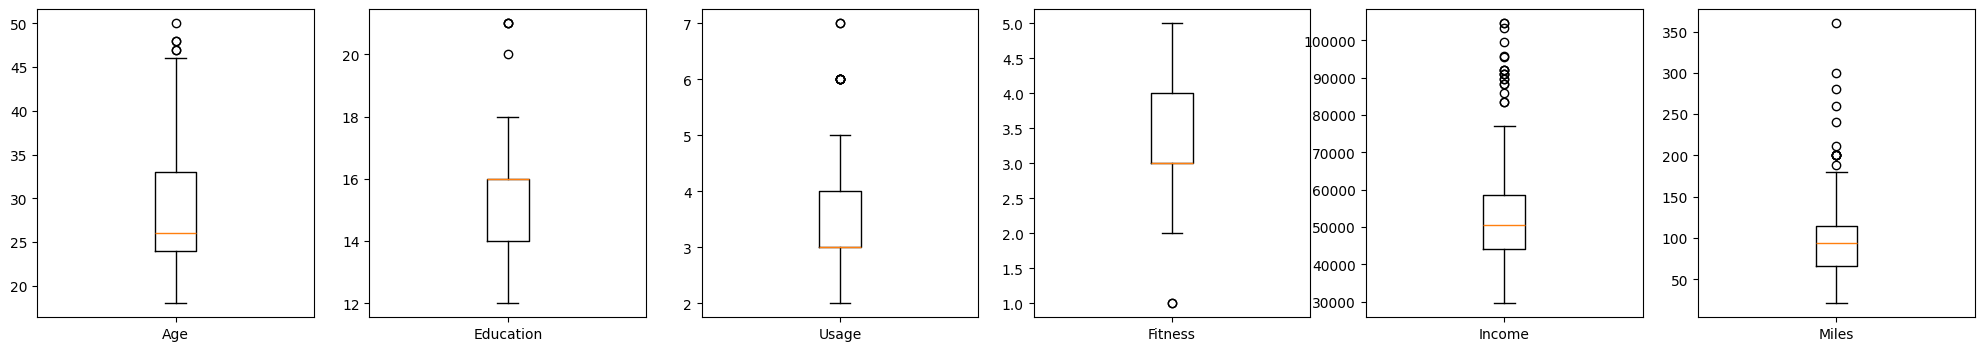

In [12]:
fig, axes = plt.subplots(1,6, figsize=(25,4))
axes = axes.ravel()
for col, ax in zip(fit_df[num_cols], axes):
  ax.boxplot(fit_df[col], tick_labels=[f'{col}'])

Variables categóricas

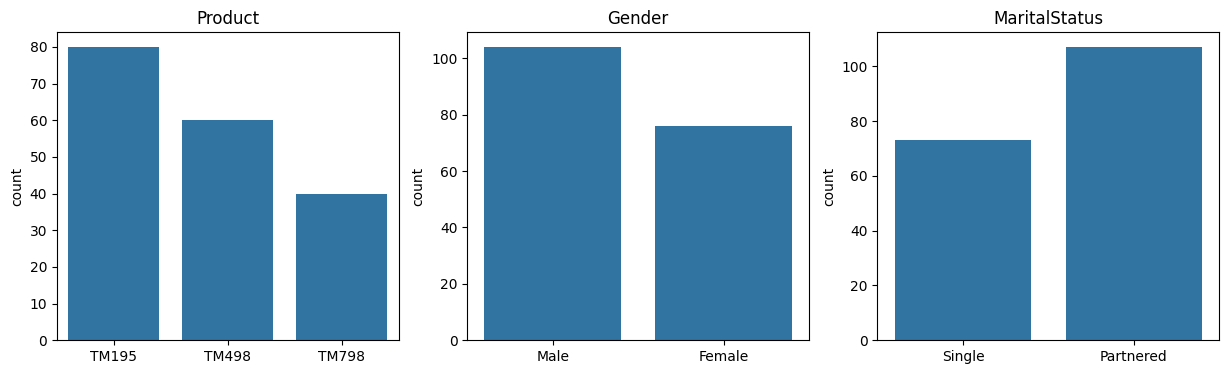

In [13]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
axes = axes.ravel()
for col, ax in zip(fit_df[cat_cols], axes):
  sns.countplot(x=fit_df[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)

## **Análisis Bivariado**

<Axes: xlabel='Product', ylabel='Age'>

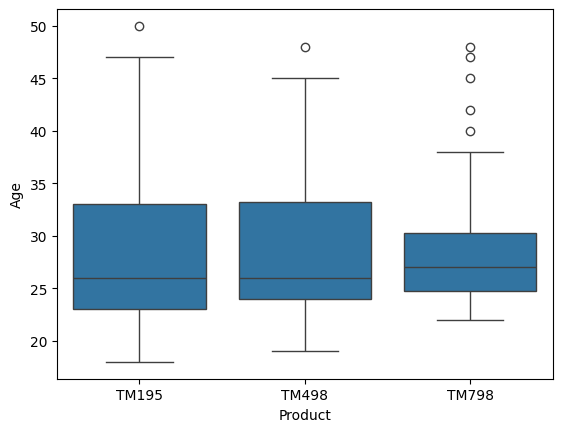

In [14]:
# Para saber si la edad influye en el producto que se compra
sns.boxplot(x='Product', y='Age', data=fit_df)

<Axes: xlabel='Gender', ylabel='Miles'>

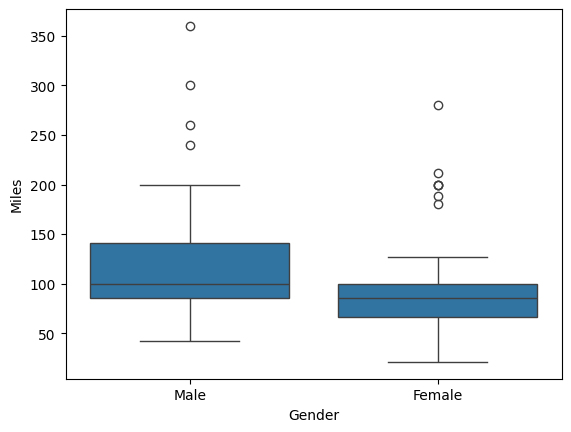

In [15]:
# Para saber si el género influye en la cantidad de millas
sns.boxplot(x='Gender', y='Miles', data=fit_df)

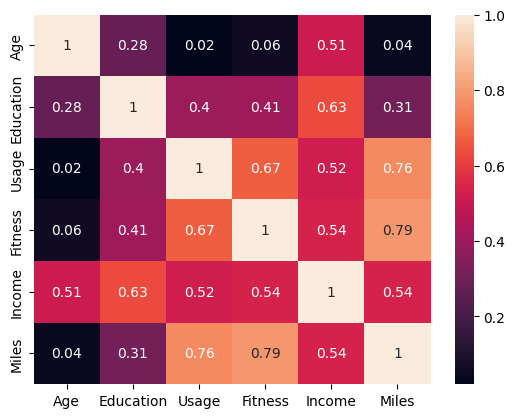

In [16]:
sns.heatmap(round(fit_df.corr(numeric_only=True),2), annot = True)
plt.show()

## **Ingeniería de características**

In [17]:
fit_transf = fit_df.copy()

In [18]:
# Discretización (binning) de la edad
# Como se generan más columnas (binarias o dummies) por el encode onehot no se puede reemplazar directamente la columna original

from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=3, strategy='uniform', encode='onehot-dense')
grouped = kb.fit_transform(fit_transf[['Age']])
grouped_df = pd.DataFrame(grouped, columns=kb.get_feature_names_out())
grouped_df

,Age_0.0,Age_1.0,Age_2.0
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
175,0.0,0.0,1.0
176,0.0,0.0,1.0
177,0.0,0.0,1.0
178,0.0,0.0,1.0


In [19]:
# Límites de los bins para 'age'
kb.bin_edges_[0]

array([18.        , 28.66666667, 39.33333333, 50.        ])

In [20]:
# Codificación de las variables categóricas de texto
# Como se generan más columnas (binarias o dummies) no se pueden reemplazar directamente las columnas originales

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(fit_transf[['Product', 'Gender', 'MaritalStatus']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
encoded_df

,Product_TM498,Product_TM798,Gender_Male,MaritalStatus_Single
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
175,0.0,1.0,1.0,1.0
176,0.0,1.0,1.0,1.0
177,0.0,1.0,1.0,1.0
178,0.0,1.0,1.0,0.0


In [21]:
# Transformación de las variables numéricas sesgadas
# Se pueden reemplazar directamente las columnas originales

from sklearn.preprocessing import PowerTransformer

boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
fit_transf[['Income','Miles']] = boxcox_transformer.fit_transform(fit_transf[['Income','Miles']])
fit_transf[['Income','Miles']]

,Income,Miles
0,1.365525,3.798889
1,1.365564,3.538352
2,1.365545,3.453180
3,1.365581,3.620744
4,1.365613,3.221864
...,...,...
175,1.365913,4.158393
176,1.365931,4.158393
177,1.365934,4.022388
178,1.365965,3.842717


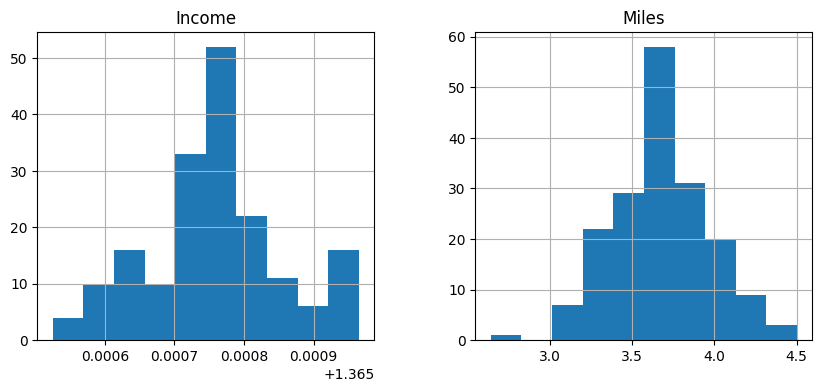

In [22]:
# Se muestra cómo la transformación cambia la distribución de las variables sesgadas (ya son más normales)
fit_transf[['Income','Miles']].hist(figsize=(10,4))
plt.show()

In [23]:
pd.options.display.float_format = '{:.2f}'.format

In [24]:
# Escalamiento de todas las variables numéricas
# Se pueden reemplazar directamente las columnas originales, pero primero se probará el
# efecto de los tres escalamientos en dataframes temporales

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
std_scaler = StandardScaler()
scaled_standar = std_scaler.fit_transform(fit_transf[num_cols])
scaled_standar_df = pd.DataFrame(scaled_standar, columns=std_scaler.get_feature_names_out())
scaled_standar_df.describe().T

# Observa media = 0 y desviación estándar = 1

,count,mean,std,min,25%,50%,75%,max
Age,180.00,0.00,1.00,-1.56,-0.69,-0.40,0.61,3.06
Education,180.00,-0.00,1.00,-2.22,-0.97,0.27,0.27,3.37
Usage,180.00,-0.00,1.00,-1.35,-0.42,-0.42,0.50,3.28
Fitness,180.00,0.00,1.00,-2.42,-0.33,-0.33,0.72,1.77
Income,180.00,0.00,1.00,-2.42,-0.51,0.03,0.56,2.13
Miles,180.00,-0.00,1.00,-3.48,-0.74,0.05,0.48,2.81


In [25]:
mm_scaler = MinMaxScaler()
scaled_minmax = mm_scaler.fit_transform(fit_transf[num_cols])
scaled_minmax_df = pd.DataFrame(scaled_minmax, columns=mm_scaler.get_feature_names_out())
scaled_minmax_df.describe().T

# Observa mínimo = 0 y máximo = 1

,count,mean,std,min,25%,50%,75%,max
Age,180.00,0.34,0.22,0.00,0.19,0.25,0.47,1.00
Education,180.00,0.40,0.18,0.00,0.22,0.44,0.44,1.00
Usage,180.00,0.29,0.22,0.00,0.20,0.20,0.40,1.00
Fitness,180.00,0.58,0.24,0.00,0.50,0.50,0.75,1.00
Income,180.00,0.53,0.22,0.00,0.42,0.54,0.65,1.00
Miles,180.00,0.55,0.16,0.00,0.44,0.56,0.63,1.00


In [26]:
rb_scaler = RobustScaler()
scaled_robust = rb_scaler.fit_transform(fit_transf[num_cols])
scaled_robust_df = pd.DataFrame(scaled_robust, columns=rb_scaler.get_feature_names_out())
scaled_robust_df.describe().T

# Observa mediana = 0

,count,mean,std,min,25%,50%,75%,max
Age,180.00,0.31,0.77,-0.89,-0.22,0.00,0.78,2.67
Education,180.00,-0.21,0.81,-2.00,-1.00,0.00,0.00,2.50
Usage,180.00,0.46,1.08,-1.00,0.00,0.00,1.00,4.00
Fitness,180.00,0.31,0.96,-2.00,0.00,0.00,1.00,2.00
Income,180.00,-0.03,0.94,-2.30,-0.51,0.00,0.49,1.97
Miles,180.00,-0.04,0.82,-2.89,-0.65,0.00,0.35,2.26


In [27]:
# Se elige un método, por ejemplo MinMax, y ya se aplica sobre las columnas originales
fit_transf[num_cols] = mm_scaler.fit_transform(fit_transf[num_cols])
fit_transf[num_cols]

,Age,Education,Usage,Fitness,Income,Miles
0,0.00,0.22,0.20,0.75,0.00,0.62
1,0.03,0.33,0.00,0.50,0.09,0.48
2,0.03,0.22,0.40,0.50,0.05,0.44
3,0.03,0.00,0.20,0.50,0.13,0.53
4,0.06,0.11,0.40,0.25,0.20,0.31
...,...,...,...,...,...,...
175,0.69,1.00,0.80,1.00,0.88,0.81
176,0.75,0.67,0.60,0.75,0.92,0.81
177,0.84,0.44,0.60,1.00,0.93,0.74
178,0.91,0.67,0.40,1.00,1.00,0.65


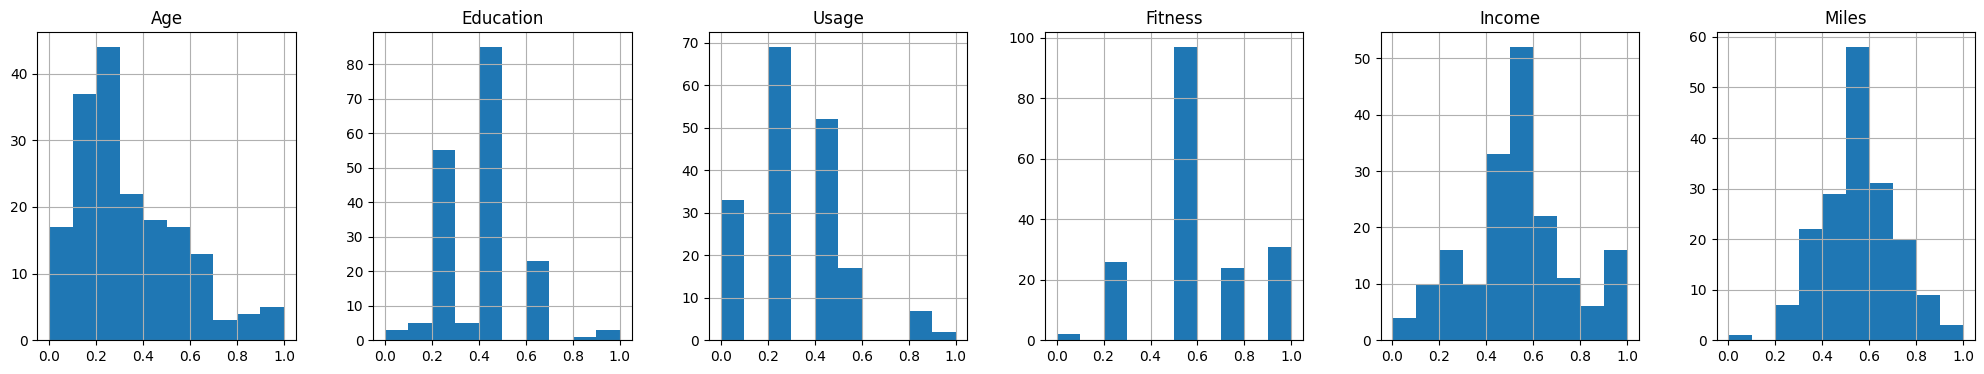

In [28]:
# Se muestra que el escalamiento no cambia la distribución de los datos, sólo modifica la escala
fit_transf[num_cols].hist(layout=(1,6), figsize=(25,4))
plt.show()

In [29]:
# Se obtiene el dataframe final quitando las variables originales que no pudieron ser reemplazadas
# porque se generaron más columnas resultado del one-hot y concatenando los dataframes de binarias
fit_transf = pd.concat(
    [fit_transf.drop(columns=['Age', 'Product', 'Gender', 'MaritalStatus']),
     grouped_df,
     encoded_df],
    axis=1
)
fit_transf

,Education,Usage,Fitness,Income,Miles,Age_0.0,Age_1.0,Age_2.0,Product_TM498,Product_TM798,Gender_Male,MaritalStatus_Single
0,0.22,0.20,0.75,0.00,0.62,1.00,0.00,0.00,0.00,0.00,1.00,1.00
1,0.33,0.00,0.50,0.09,0.48,1.00,0.00,0.00,0.00,0.00,1.00,1.00
2,0.22,0.40,0.50,0.05,0.44,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.20,0.50,0.13,0.53,1.00,0.00,0.00,0.00,0.00,1.00,1.00
4,0.11,0.40,0.25,0.20,0.31,1.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.00,0.80,1.00,0.88,0.81,0.00,0.00,1.00,0.00,1.00,1.00,1.00
176,0.67,0.60,0.75,0.92,0.81,0.00,0.00,1.00,0.00,1.00,1.00,1.00
177,0.44,0.60,1.00,0.93,0.74,0.00,0.00,1.00,0.00,1.00,1.00,1.00
178,0.67,0.40,1.00,1.00,0.65,0.00,0.00,1.00,0.00,1.00,1.00,0.00
